In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
ds = pd.read_csv('Assignment 4v2.csv', sep=',')
ds.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
dsCorrelations = ds.corr()
dsCorrelations.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.00,0.00,0.00,-0.00,0.00,0.00,0.01
age,0.00,1.00,0.28,0.26,0.24,0.33,0.25
hypertension,0.00,0.28,1.00,0.11,0.17,0.17,0.13
heart_disease,-0.00,0.26,0.11,1.00,0.16,0.04,0.13
avg_glucose_level,0.00,0.24,0.17,0.16,1.00,0.18,0.13
bmi,0.00,0.33,0.17,0.04,0.18,1.00,0.04
stroke,0.01,0.25,0.13,0.13,0.13,0.04,1.00


(De correlations tussen 'id' en andere waardes kunnen logischer wijs buiten beschouwing gelaten worden)

Uit bovenstaande tabel is te concluderen dat er in deze dataset niet echt sprake is van sterke corrrelations. De sterkste correlation is tussen de waardes van 'bmi' en 'age'. De zwakste correlation is tussen de waardes van 'hypertension' en 'heart_disease'.

Hieruit is te concluderen dat de verschillende waardes binnen deze dataset wel enige samenhang hebben. 

Persoonlijk had ik duidelijkere correlations verwacht. Ik had niet verwacht dat de correlation tussen 'bmi' en 'age' het sterkste was van allemaal. Eerder had ik verwacht dat de correlation tussen bijvoorbeeld 'hypertension' of 'heart_disease' samen met 'stroke' sterker was omdat dit in mijn ogen een mogelijke oorzaken kunnen zijn voor een stroke. 

Een nadeel van deze dataset is dat een aantal waardes enkel de waarde 0 en 1 bevatten, hierdoor krijg je op bijvoorbeeld 'heart disease' en 'stroke' een zeer onduidelijke scatterplot.

<AxesSubplot:xlabel='bmi', ylabel='age'>

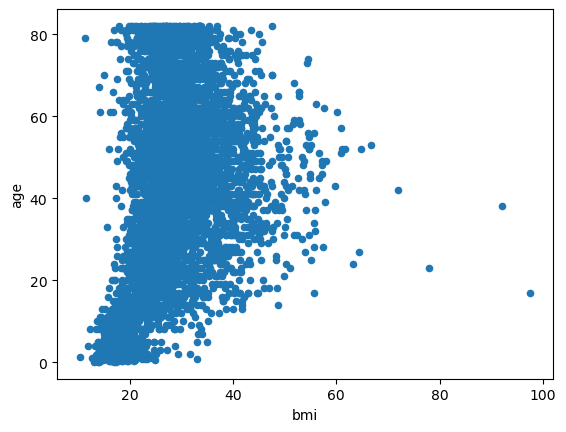

In [4]:
ds.plot(kind='scatter', x='bmi', y='age')

<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

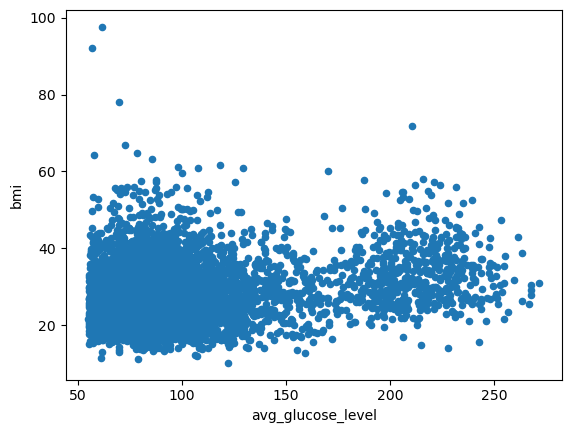

In [5]:
ds.plot(kind='scatter', x='avg_glucose_level', y='bmi')

Om te kijken of er eventueel verschil zit tussen de correlations wanneer de verhoudingen qua het krijgen van een stroke gelijk zijn (dus 50% van de mensen heeft een stroke gehad en 50% van de mensen heeft geen stroke gehad), zal er hieronder gebruik gemaakt worden van een kleinere dataframe die deze verhouding aanhoudt.

In [6]:
stroke = ds[ds['stroke'] == 1]
noStroke = ds[ds['stroke'] == 0]
display(stroke)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


In [7]:
noStroke = noStroke.sample(n=249, random_state=1)
frames = [stroke, noStroke]
df = pd.concat(frames)
display(df)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1577,6304,Male,48.0,1,0,Yes,Self-employed,Urban,79.20,32.5,never smoked,0
3543,56755,Male,41.0,0,0,Yes,Private,Rural,108.71,24.0,never smoked,0
1951,1460,Female,82.0,0,0,Yes,Private,Urban,99.68,22.2,Unknown,0
1044,66752,Female,79.0,0,0,Yes,Govt_job,Urban,93.89,30.4,never smoked,0


In [8]:
dsCorrelations = df.corr()
dsCorrelations.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.00,-0.04,-0.06,0.03,0.04,-0.07,0.05
age,-0.04,1.00,0.28,0.26,0.25,0.20,0.58
hypertension,-0.06,0.28,1.00,0.11,0.13,0.11,0.21
heart_disease,0.03,0.26,0.11,1.00,0.22,0.03,0.24
avg_glucose_level,0.04,0.25,0.13,0.22,1.00,0.29,0.22
bmi,-0.07,0.20,0.11,0.03,0.29,1.00,0.12
stroke,0.05,0.58,0.21,0.24,0.22,0.12,1.00


Nu de verhoudingen qua kans op een stroke gelijk is, is in de tabel hierboven te zien dat de correlations daadwerkelijk zijn veranderd. Persoonlijk denk ik dat dit een realistischer beeld weergeeft omdat nu de factoren die kunnen leiden tot het krijgen van een stroke duidelijker weergegeven worden dan wanneer de verhouding ongelijk zou zijn. 

In vergelijking tot de eerste tabel, waar de verhouding nog niet gelijk was, heeft de leeftijd van een persoon nu wel een duidelijke invloed op het krijgen van een stroke. Verder is de correlation tussen bmi en avg_glucose_level nu ook een stuk sterker dan eerst.  

<AxesSubplot:xlabel='age', ylabel='stroke'>

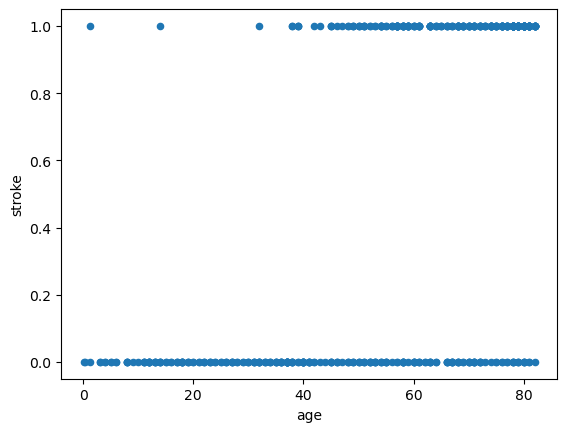

In [9]:
df.plot(kind='scatter', x='age', y='stroke')

<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

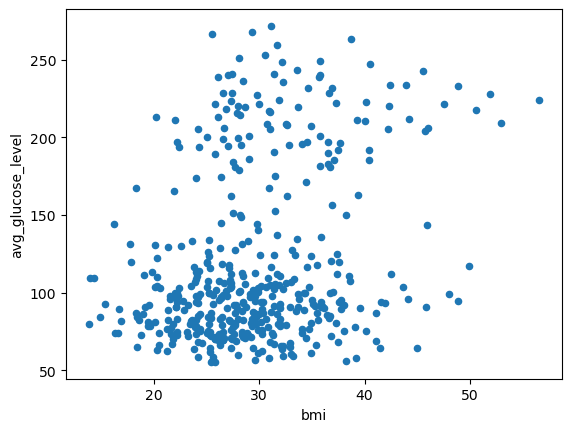

In [10]:
df.plot(kind='scatter', x='bmi', y='avg_glucose_level')